## Replication of *Three Pathways for Observed Resonant Chains* (Macdonald 2018)

## Simulation Initial Conditions
Forces were applied only to the outermost planet. Parameters taken from Tables 1 and 2: 
<center>
<img width=500 src="./Figures/macdonald_table1.png"></img>
</center>
<center>
<img width=500 src="./Figures/macdonald_table2.png"></img>
</center>

Note that the period values at the top of each table is the present-day value.

To store all these parameters, we use a nested Python dictionary, so that we can easily access the distribution parameters.

Similar to the paper, we draw masses and inclinations from normal distributions, but we will use data from Agol et al. 2021, which have much lower variances.

https://exoplanetarchive.ipac.caltech.edu/overview/TRAPPIST-1

In [286]:
import rebound
import reboundx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

systems = {
    "Kepler-80": {
        "d": {
            "P": 3.072,
            "m": {"type": "normal", "mean": 6.48, "std": 0.46},
            "inc": {"type": "normal", "mean": 88.35, "std": 1.51},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 427.5,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "e": {
            "P": 4.645,
            "m": {"type": "normal", "mean": 4.92, "std": 0.49},
            "inc": {"type": "normal", "mean": 88.79, "std": 1.07},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 648.3,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "b": {
            "P": 7.052,
            "m": {"type": "normal", "mean": 5.99, "std": 0.57},
            "inc": {"type": "normal", "mean": 89.34, "std": 0.62},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 989.7,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "c": {
            "P": 9.524,
            "m": {"type": "normal", "mean": 5.03, "std": 0.42},
            "inc": {"type": "normal", "mean": 89.33, "std": 0.57},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 1395.0,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        }
    },
    "Kepler-223": {
        "b": {
            "P": 7.834,
            "m": {"type": "normal", "mean": 7.4, "std": 1.3},
            "inc": {"type": "normal", "mean": 90.0, "std": 1.8},
            "ecc": 0.078,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 344.4,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": {"type": "normal", "mean": 0.078, "std": 0.01}
        },
        "c": {
            "P": 9.846,
            "m": {"type": "normal", "mean": 5.1, "std": 1.7},
            "inc": {"type": "normal", "mean": 90.0, "std": 1.3},
            "ecc": 0.15,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 473.2,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": {"type": "normal", "mean": 0.15, "std": 0.005}
        },
        "d": {
            "P": 14.789,
            "m": {"type": "normal", "mean": 8.0, "std": 1.5},
            "inc": {"type": "normal", "mean": 87.94, "std": 0.32},
            "ecc": 0.037,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 751.2,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": {"type": "normal", "mean": 0.037, "std": 0.005}
        },
        "e": {
            "P": 19.729,
            "m": {"type": "normal", "mean": 4.8, "std": 1.4},
            "inc": {"type": "normal", "mean": 88.00, "std": 0.27},
            "ecc": 0.051,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 1129.4,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": {"type": "normal", "mean": 0.051, "std": 0.005}
        }
    },
    "Kepler-60": {
        "b": {
            "P": 7.1334,
            "m": {"type": "normal", "mean": 4.42, "std": 0.97},
            "inc": 90.0,
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 550.6,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "c": {
            "P": 8.9187,
            "m": {"type": "normal", "mean": 4.09, "std": 1.59},
            "inc": 90.0,
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 730.7,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "d": {
            "P": 11.8981,
            "m": {"type": "normal", "mean": 4.42, "std": 0.81},
            "inc": 90,
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 1000.0,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        }
    },
    "TRAPPIST-1": {
        "b": {
            "P": 1.511,
            "m": {"type": "normal", "mean": 1.374, "std": 0.069},
            "inc": {"type": "normal", "mean": 89.728, "std": 0.165},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 1291,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "c": {
            "P": 2.422,
            "m": {"type": "normal", "mean": 1.308, "std": 0.056},
            "inc": {"type": "normal", "mean": 89.778, "std": 0.118},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 2324,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "d": {
            "P": 4.050,
            "m": {"type": "normal", "mean": 0.388, "std": 0.012},
            "inc": {"type": "normal", "mean": 89.896, "std": 0.077},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 3952,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "e": {
            "P": 6.100,
            "m": {"type": "normal", "mean": 0.692, "std": 0.022},
            "inc": {"type": "normal", "mean": 89.793, "std": 0.048},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 6322,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "f": {
            "P": 9.207,
            "m": {"type": "normal", "mean": 1.039, "std": 0.031},
            "inc": {"type": "normal", "mean": 89.740, "std": 0.019},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 10116,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        },
        "g": {
            "P": 12.353,
            "m": {"type": "normal", "mean": 1.321, "std": 0.038},
            "inc": {"type": "normal", "mean": 89.742, "std": 0.012},
            "ecc": 0.0,
            "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "P_lm": 14162,
            "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
            "e_ecc": 0.04
        }
        # h was not discussed
        # "h": { 
        #     "P": 18.773,
        #     "m": {"type": "normal", "mean": 0.326, "std": 0.020},
        #     "inc": {"type": "normal", "mean": 89.805, "std": 0.013},
        #     "ecc": 0.0,
        #     "P_sm": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
        #     "P_lm": ,
        #     "P_ecc": {"type": "scaled_normal", "mean": 0.09, "std": 0.03, "offset": 1.0, "multiplier": "P"},
        #     "e_ecc": 0.04
        # }
    }
}

We can generate Pandas Dataframes as such when necessary.

In [287]:
# Numerical, for fast operations
df_num = pd.DataFrame([
    {"system": sys, "planet": p, "P (days)": data["P"]}
    for sys, planets in systems.items()
    for p, data in planets.items()
])

# Metadata, for distributions
df_dist = pd.DataFrame([
    {"system": sys, "planet": p, "m_dist": data["m"], "inc_dist": data["inc"]}
    for sys, planets in systems.items()
    for p, data in planets.items()
])

df_num.iloc[11:17]


,system,planet,P (days)
11,TRAPPIST-1,b,1.511
12,TRAPPIST-1,c,2.422
13,TRAPPIST-1,d,4.050
14,TRAPPIST-1,e,6.100
15,TRAPPIST-1,f,9.207
16,TRAPPIST-1,g,12.353


### TRAPPIST-1

In [288]:
method = "ecc"

# Long-scale disk-driven migration
if method == "long": 
    tau_a = 9.3e8 # days
    tau_e = 8.2e6 # days
    runs = 600
    T_1 = tau_a * 7 # length of damping
    T_2 = T_1 * 3 # total time of sim
    
# Short-scale disk-driven migration
elif method == "short":
    tau_a = 3.5e7 # days
    tau_e = 1.5e4 # days
    runs = 500
    T_1 = 5e6 # length of damping
    T_2 = 9e7 # total time of sim
    
# Eccentricity damping only
elif method == "ecc":
    tau_e = 1.1e4 # days
    runs = 600
    T_1 = 5e6 # length of damping
    T_2 = T_1 * 3 # total time of sim

Setting values for masses, semimajor axes, and inclinations

In [289]:
m_star = 0.08

trappist1_planets = systems["TRAPPIST-1"]

# Different starting periods for each method
P_init = []
if method == "long":
    P_init = np.array([trappist1_planets[p]["P_lm"] for p in trappist1_planets]) # days
elif method == "short":
    for planet, params in trappist1_planets.items():
        P_sm = params["P_sm"]
        sample = (np.random.normal(P_sm["mean"], P_sm["std"]) + 1) * params["P"]
        P_init.append(sample)
elif method == "ecc":
    for planet, params in trappist1_planets.items():
        P_ecc = params["P_ecc"]
        sample = (np.random.normal(P_ecc["mean"], P_ecc["std"]) + 1) * params["P"]
        P_init.append(sample)

P_init = np.array(P_init)
print(P_init)

# Use Kepler's law to convert P's to a's
P_init_yrs = P_init / 365.24
a_init = (P_init_yrs**2 * m_star)**(1/3)

# Define planet masses and inclinations
masses = []
incs = []

for planet, params in trappist1_planets.items():
    m = params["m"]
    inc = params["inc"]
    
    if m["type"] == "normal":
        sample = np.random.normal(m["mean"], m["std"])
        masses.append(sample)
        
    if inc["type"] == "normal":
        sample = np.random.normal(inc["mean"], inc["std"])
        incs.append(sample)

masses = np.array(masses)
incs = np.array(incs)

# For expanding to multiple runs:
# samples = {}

# for planet, params in systems["TRAPPIST-1"].items():
#     m = params["m"]
#     if m["type"] == "normal":
#         samples[planet] = np.random.normal(m["mean"], m["std"], size=runs)

masses *= 3.003e-6 # convert to M_Earth

[ 1.61688509  2.64787488  4.44454365  6.62043787  9.97632323 14.20030821]


Simulation set-up

In [290]:
# Create the simulation
sim = rebound.Simulation()
sim.units = ('AU', 'day', 'Msun') # note time units
sim.integrator = "whfast"

# Add the star
sim.add(m=m_star)

# Add planets to sim
for i in range(3): # number of planets in sim
    if method == "ecc":
        sim.add(m=masses[i], a=a_init[i], e=0.04, inc=incs[i])
    else:
        sim.add(m=masses[i], a=a_init[i], e=0, inc=incs[i])
sim.move_to_com()
ps = sim.particles

num_planets = len(ps) - 1

rebx = reboundx.Extras(sim)

# Orbital damping
mof = rebx.load_force("modify_orbits_forces")
rebx.add_force(mof)

sim.integrator = 'whfast'
# Timestep of 5% of the innermost planet's observed period
sim.dt = P_b = trappist1_planets["b"]["P"] * 0.05 # 0.076

sim.dt *= 5 # to make it run faster

In [ ]:
time_steps = 2000

# Temporary T_1
T_1 = 5e4 * 365

times = np.linspace(0, T_1, time_steps, endpoint=False)
times_kyrs = times / 365240

a_vals = np.full((num_planets, time_steps), np.nan)
e_vals = np.full((num_planets, time_steps), np.nan)
n_vals = np.full((num_planets, time_steps), np.nan)
P_vals = np.full((num_planets, time_steps), np.nan)
P_ratios = np.full((num_planets-1, time_steps), np.nan)

for i, t in enumerate(times):
    sim.integrate(t)

    for j, p in enumerate(ps[1:]):  # skip the star
        a_vals[j, i] = p.a
        e_vals[j, i] = p.e
        # n_vals[j, i] = np.sqrt(sim.G * ps[0].m / p.a**3) 
        # P_vals[j, i] = 2 * np.pi / n_vals[j, i]
    for j, p in enumerate(ps[1:num_planets]):  # each planet pair
        pass 
        # P_ratios[j, i] = P_vals[j+1, i] / P_vals[j, i]
        
    for j, p in enumerate(ps[1:]):
        if method != "ecc":
            p.params["tau_e"] = -tau_e
        elif j == num_planets - 1: # Outermost planet
            p.params["tau_a"] = -tau_a    
            p.params["tau_e"] = -tau_e

/opt/homebrew/lib/python3.14/site-packages/rebound/simulation.py:259: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator. See REBOUNDx paper sec 5.1.
  warnings.warn(msg[1:], RuntimeWarning)


#### Plotting semi-major axis and eccentricity evolution

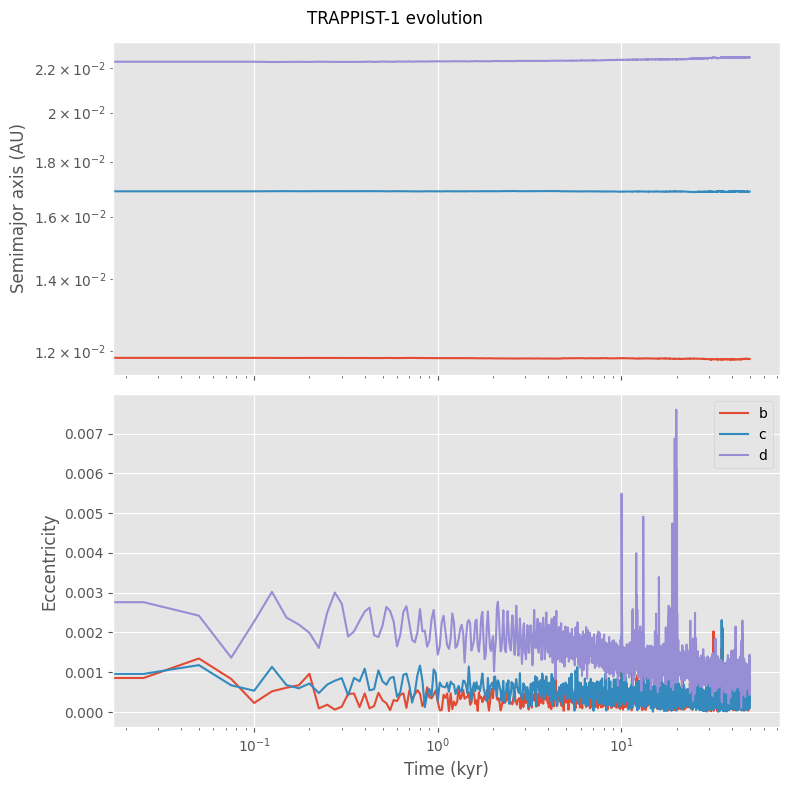

In [ ]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_figwidth(8.0)
fig.set_figheight(8.0)


for j in range(num_planets):
    # could also try plotting log
    ax1.plot(times_kyrs, a_vals[j], label=f'{chr(98+j)}')  # b, c, d, ...
    ax2.plot(times_kyrs, e_vals[j], label=f'{chr(98+j)}')  
plt.xlabel("Time (kyr)")
ax1.set_ylabel("Semimajor axis (AU)")
ax2.set_ylabel("Eccentricity")
# ax1.set_ylim(0.005, 0.13)
# ax2.set_ylim(-0.01, 0.2)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')

fig.subplots_adjust(hspace=0)

plt.suptitle("TRAPPIST-1 evolution")
plt.legend()
plt.tight_layout()
plt.show()